# Demo Code for 'Differential ghost imaging with learned modulation patterns'
##### Author: Xiao Wang 

In [1]:
import numpy as np
import torch 
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import time
from tqdm import tqdm
import h5py
import matplotlib.pyplot as plt

from model import *

# Device setup
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


##### Data Load

/tmp/ipykernel_1961742/111123705.py:7: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  x = np.array(dataset['x1']).T


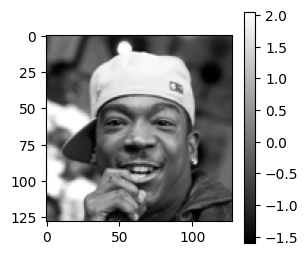

29000 training examples loaded.
1000 test examples loaded.


In [2]:

img_size = 128
img_pixels = img_size * img_size
base_nums = 1024

def load_dataset(file_path):
    with h5py.File(file_path, 'r') as dataset:
        x = np.array(dataset['x1']).T
    return x

# Load and preprocess dataset

# In our configuration, the training data is stored in '.mat' files in the format
# of [n, height, width]. Users can store and load the training data in their preferred
# manner. Our training datasets are CelebAMask-HQ and STL-10, both resized to [128, 128].

x = load_dataset('Your path to the dataset.') # Change this to your path
x = x.astype('float32')
x_train, x_test = x[1000:], x[:1000]

# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, img_size, img_size)

x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, img_size, img_size)


# Display example images
plt.figure(figsize=(3, 3))
plt.imshow(x_train_scaled[0], cmap='gray')
plt.colorbar()
plt.show()


# Convert numpy arrays to PyTorch tensors
x_train_scaled = torch.from_numpy(x_train_scaled)
x_test_scaled = torch.from_numpy(x_test_scaled)

# Create TensorDataset
train_set = TensorDataset(x_train_scaled, x_train_scaled)
test_set = TensorDataset(x_test_scaled, x_test_scaled)

# Print dataset sizes
print(f"{x_train_scaled.shape[0]} training examples loaded.")
print(f"{x_test_scaled.shape[0]} test examples loaded.")

# Optionally, create DataLoaders
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)


##### Model

In [3]:
spi = Spi(base_nums = 1024).to(device)
loss_fn = CovarianceReg_Loss(reg=0.01, loss_fn=nn.MSELoss()).to(device)

optimizer = torch.optim.Adam(spi.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20, 30, 40], gamma=1/3)

train_loader = DataLoader(train_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)

##### Train

In epoch: 1


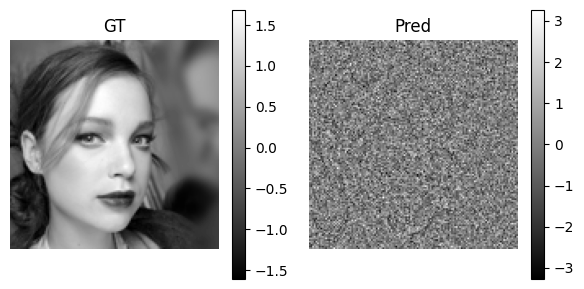

Total test loss: 161.0033769607544
In epoch: 2


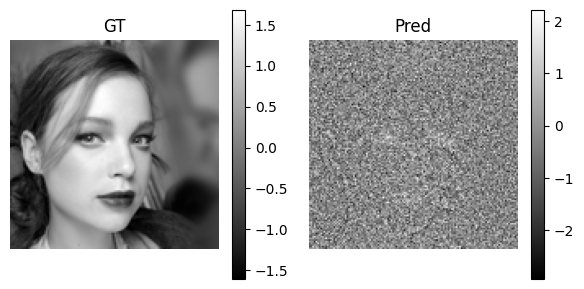

Total test loss: 116.86101770401001
In epoch: 3


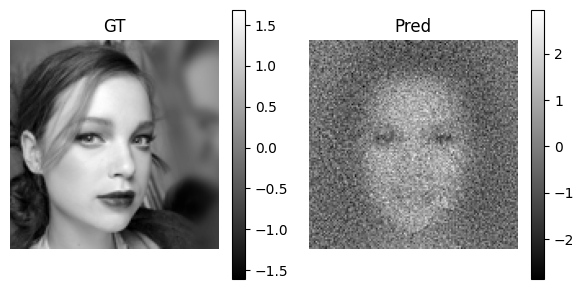

Total test loss: 74.36005401611328
In epoch: 4


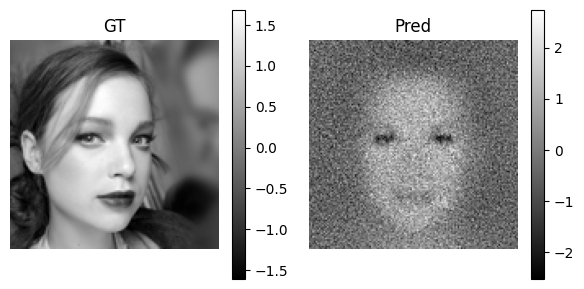

Total test loss: 43.72214221954346
In epoch: 5


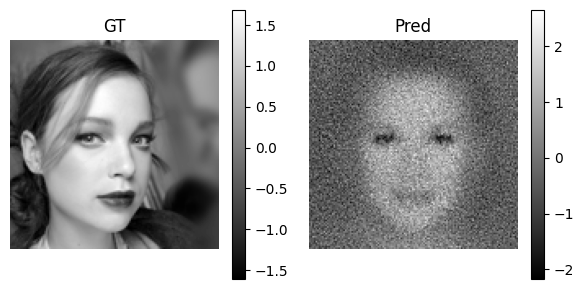

Total test loss: 32.28508275747299
In epoch: 6


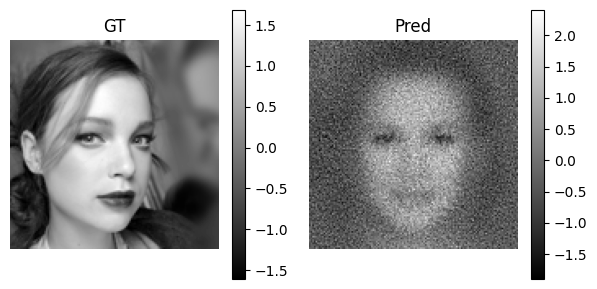

Total test loss: 25.73235857486725
In epoch: 7


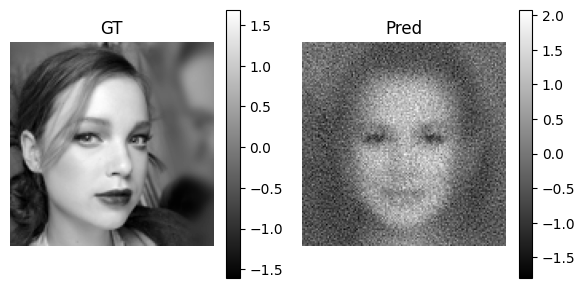

Total test loss: 22.023748636245728
In epoch: 8


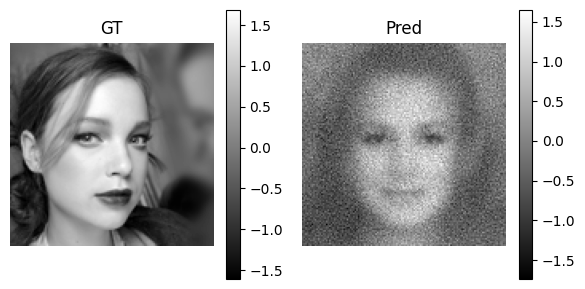

Total test loss: 20.165495097637177
In epoch: 9


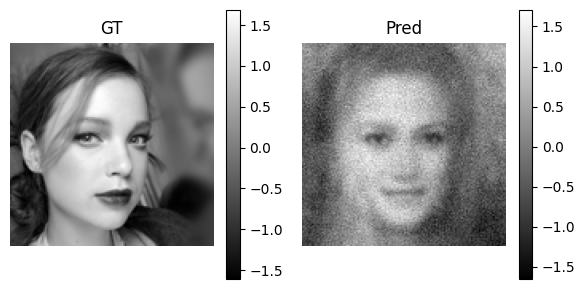

Total test loss: 15.427722364664078
In epoch: 10


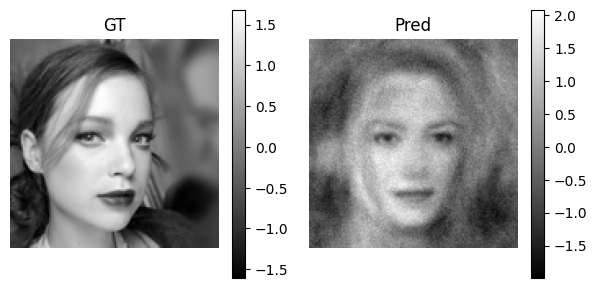

Total test loss: 10.45540663599968
In epoch: 11


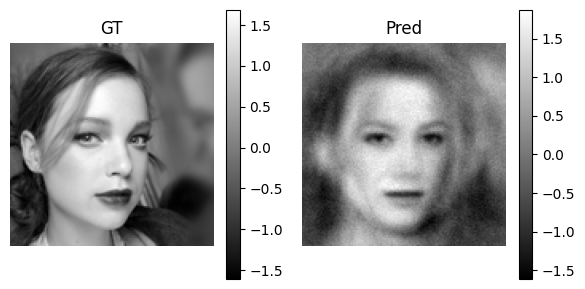

Total test loss: 7.760281875729561
In epoch: 12


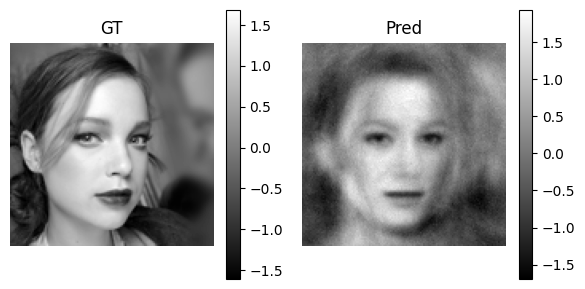

Total test loss: 7.846750557422638
In epoch: 13


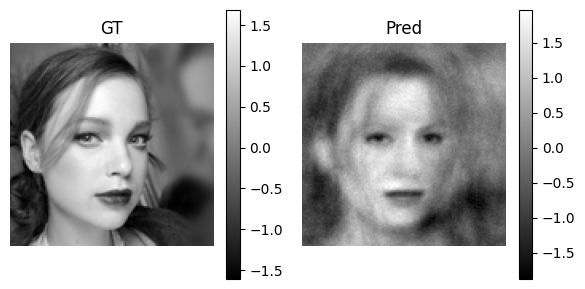

Total test loss: 6.92656897008419
In epoch: 14


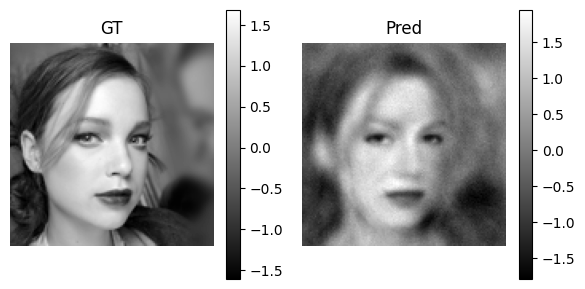

Total test loss: 7.240133032202721
In epoch: 15


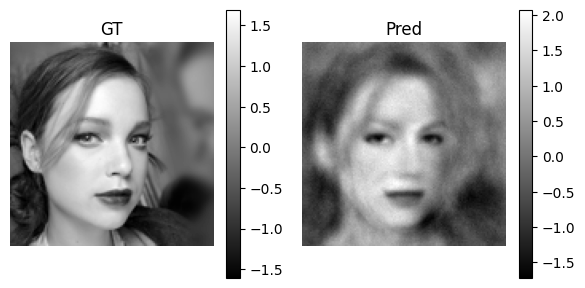

Total test loss: 5.412911802530289
In epoch: 16


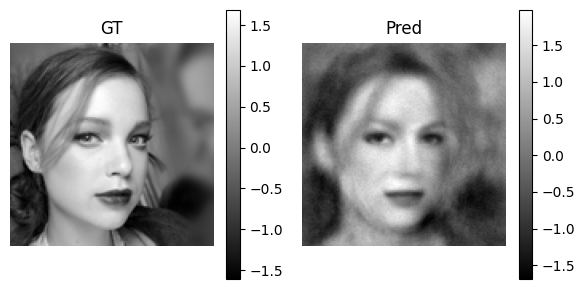

Total test loss: 5.062562510371208
In epoch: 17


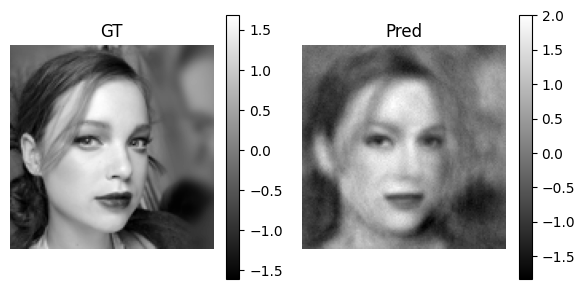

Total test loss: 5.157867103815079
In epoch: 18


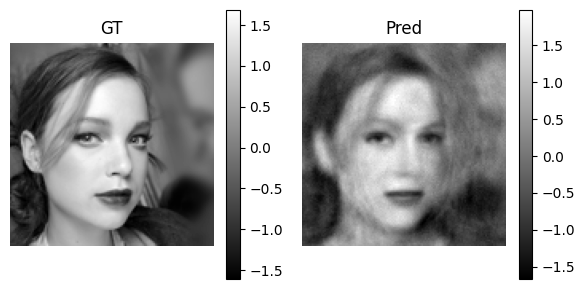

Total test loss: 5.431037485599518
In epoch: 19


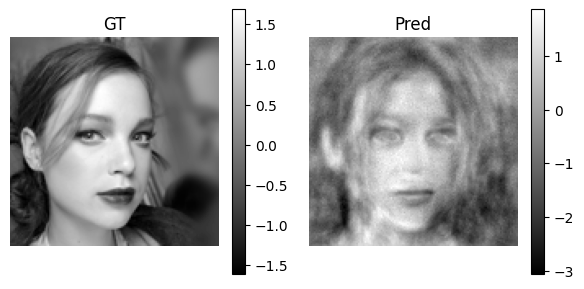

Total test loss: 9.301686316728592
In epoch: 20


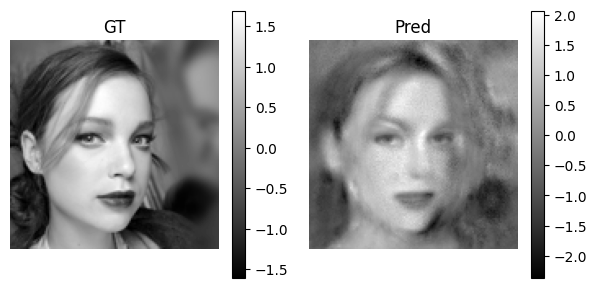

Total test loss: 24.641473829746246
In epoch: 21


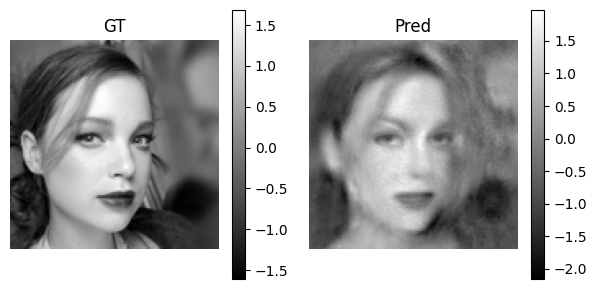

Total test loss: 20.60935014486313
In epoch: 22


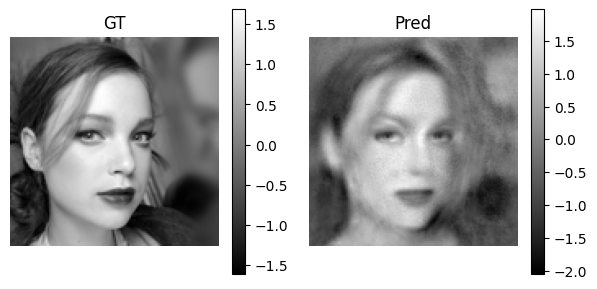

Total test loss: 16.377923160791397
In epoch: 23


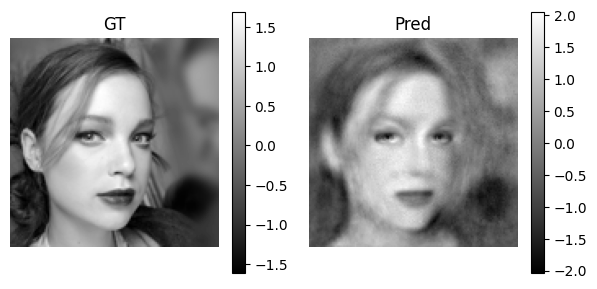

Total test loss: 12.441067427396774
In epoch: 24


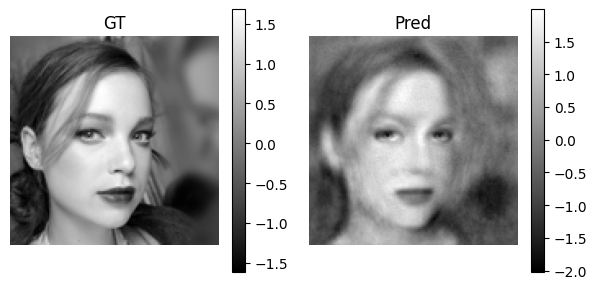

Total test loss: 8.864409908652306
In epoch: 25


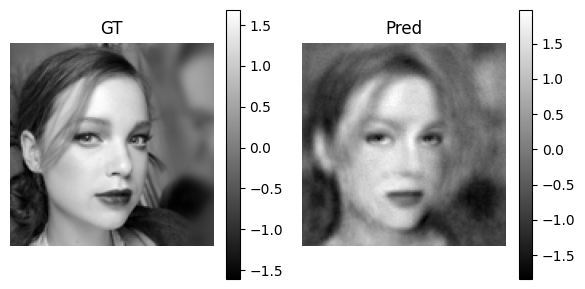

Total test loss: 6.405758753418922
In epoch: 26


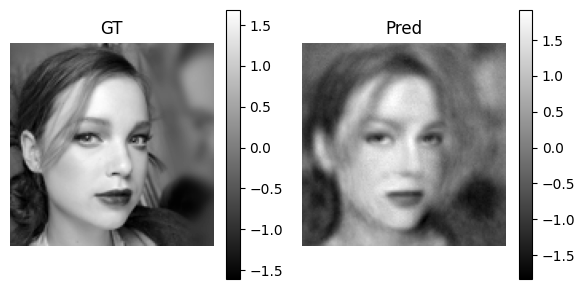

Total test loss: 5.000476717948914
In epoch: 27


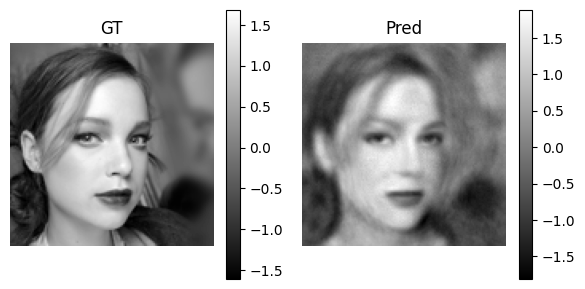

Total test loss: 4.351955309510231
In epoch: 28


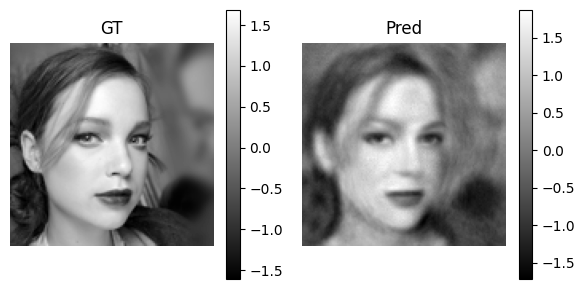

Total test loss: 4.152464851737022
In epoch: 29


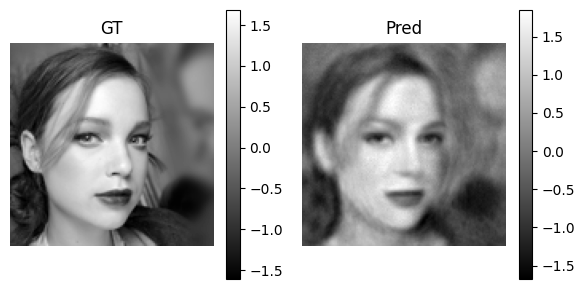

Total test loss: 4.210012175142765
In epoch: 30


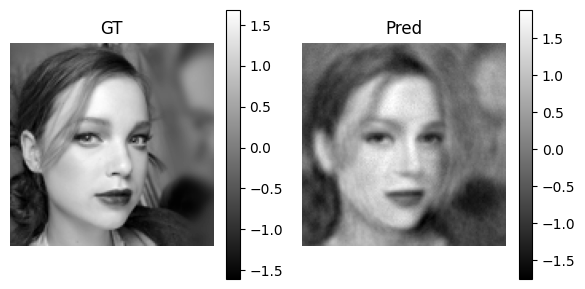

Total test loss: 4.281063370406628
In epoch: 31


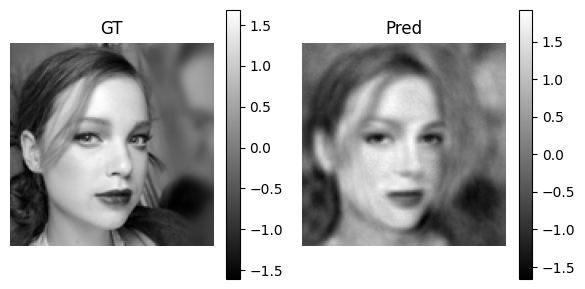

Total test loss: 4.00466987490654
In epoch: 32


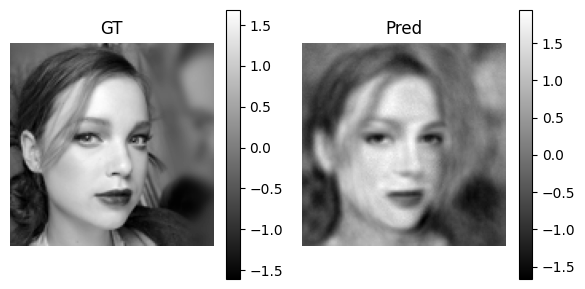

Total test loss: 4.030349962413311
In epoch: 33


Total test loss: 3.9556602239608765
In epoch: 34


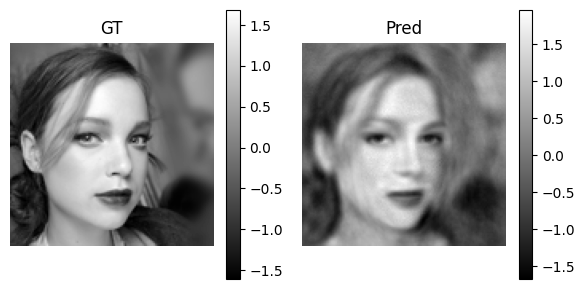

Total test loss: 3.8900813460350037
In epoch: 35


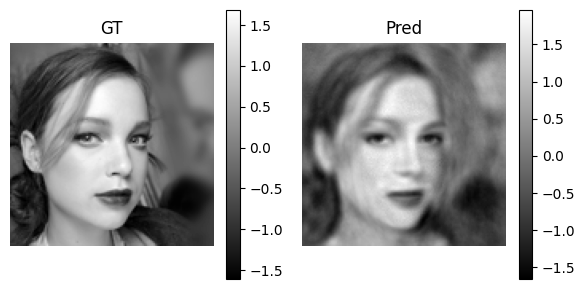

Total test loss: 3.847382292151451
In epoch: 36


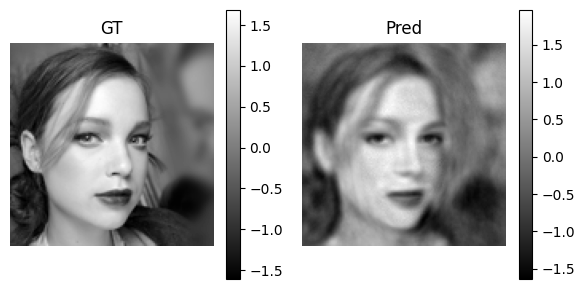

Total test loss: 3.819882020354271
In epoch: 37


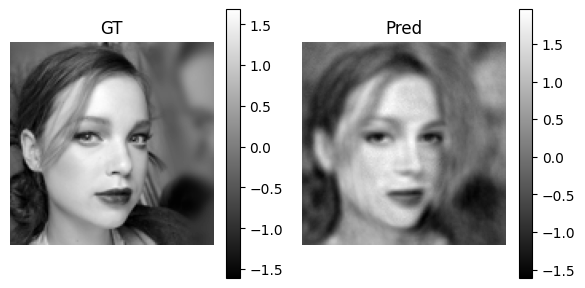

Total test loss: 3.800836645066738
In epoch: 38


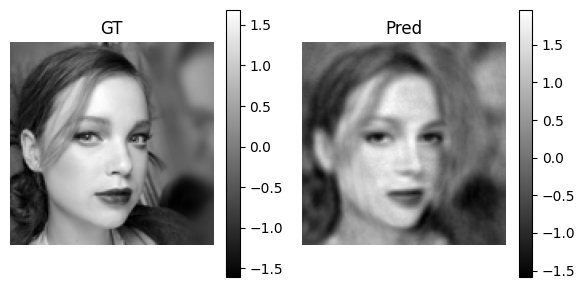

Total test loss: 3.7864677608013153
In epoch: 39


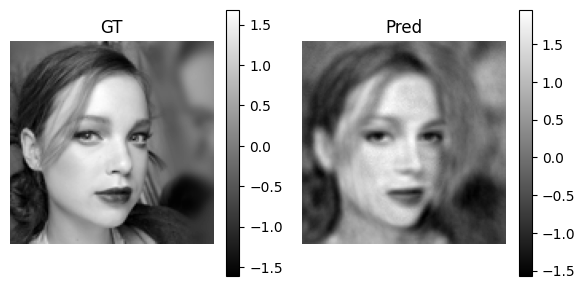

Total test loss: 3.774759441614151
In epoch: 40


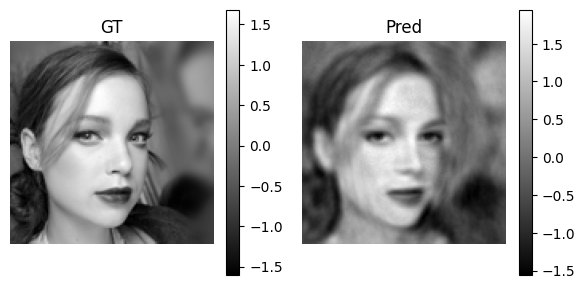

Total test loss: 3.7643770948052406
In epoch: 41


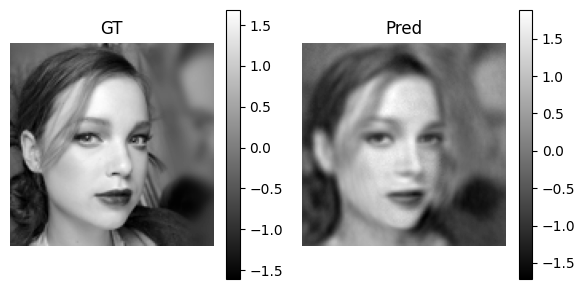

Total test loss: 3.1649128645658493
In epoch: 42


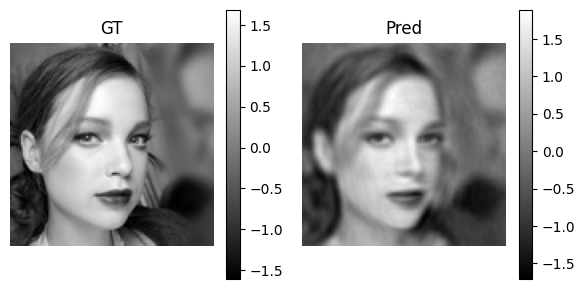

Total test loss: 3.1468798592686653
In epoch: 43


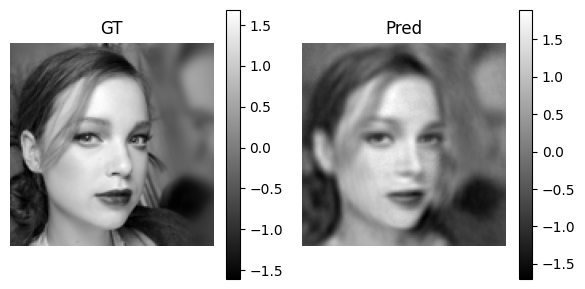

Total test loss: 3.1353782638907433
In epoch: 44


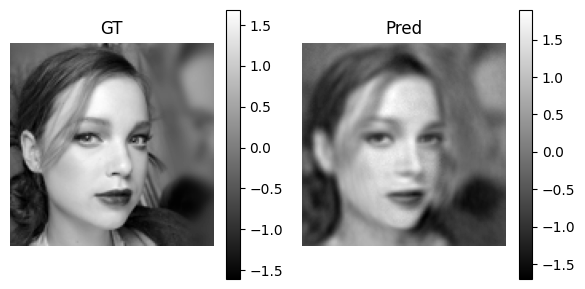

Total test loss: 3.1271070167422295
In epoch: 45


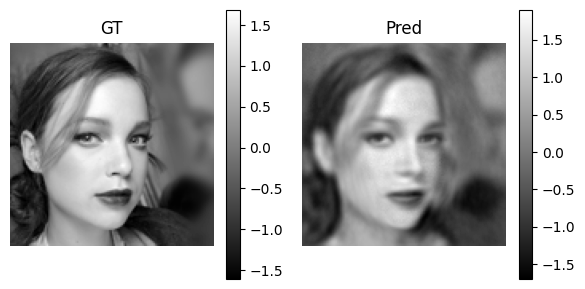

Total test loss: 3.120671272277832
In epoch: 46


Total test loss: 3.115348070859909
In epoch: 47


Total test loss: 3.1107228696346283
In epoch: 48


Total test loss: 3.106558509171009
In epoch: 49


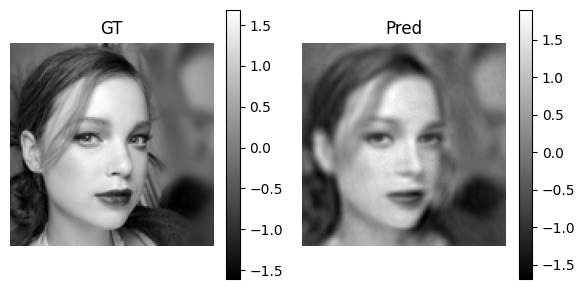

Total test loss: 3.102721519768238
In epoch: 50


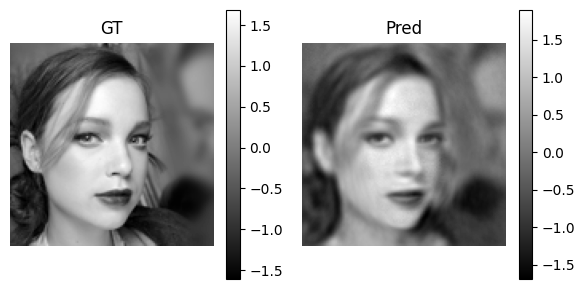

Total test loss: 3.0991345420479774
Program Execution Time: 4303.333024978638


In [4]:
start = time.time()

for epoch in range(50):
    print(f"In epoch: {epoch + 1}")
    
    spi.train()
    train_loader_tqdm = tqdm(train_loader, desc="Training", leave=False)
    
    for imgs, targets in train_loader_tqdm:
        imgs, targets = imgs.to(device), targets.to(device)
        outputs = spi(imgs)
        loss = loss_fn(outputs, targets, spi)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update progress bar description with current loss
        train_loader_tqdm.set_postfix(loss=loss.item())
    
    scheduler.step()
    
    spi.eval()
    total_test_loss = 0
    test_loader_tqdm = tqdm(test_loader, desc="Testing", leave=False)
    
    with torch.no_grad():
        for imgs, targets in test_loader_tqdm:
            imgs, targets = imgs.to(device), targets.to(device)
            outputs = spi(imgs)
            batch_loss = loss_fn(outputs, targets, spi).item()
            total_test_loss += batch_loss

            # Update progress bar description with current batch loss
            test_loader_tqdm.set_postfix(batch_loss=batch_loss)
    
    img_test, target_test = test_set[19]
    img_test, target_test = img_test.to(device), target_test.to(device)
    output = spi(img_test.unsqueeze(0)).squeeze(0)
    



    fig, axs = plt.subplots(1, 2, figsize=(6, 3))


    axs[0].imshow(img_test.cpu().numpy(), cmap='gray')
    axs[0].set_title('GT')
    axs[0].axis('off')
    fig.colorbar(axs[0].imshow(img_test.cpu().numpy(), cmap='gray'), ax=axs[0], orientation='vertical')


    axs[1].imshow(output.cpu().detach().numpy(), cmap='gray')
    axs[1].set_title('Pred')
    axs[1].axis('off')
    fig.colorbar(axs[1].imshow(output.cpu().detach().numpy(), cmap='gray'), ax=axs[1], orientation='vertical')

    plt.tight_layout()
    plt.show()

    
    print(f"Total test loss: {total_test_loss}")

end = time.time()
print(f'Program Execution Time: {end - start}')
